In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


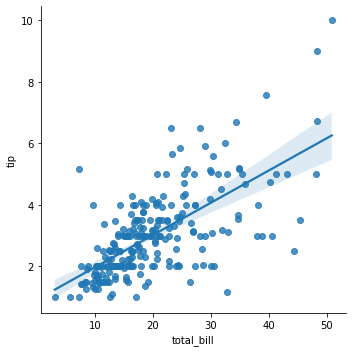

In [4]:
sns.lmplot(x='total_bill', y='tip', data=tips);

\
\
\
\

## OLS(Ordinary Least Square) 메소드를 사용한 단순 선형 회귀  
- OLS: 잔차제곱합(RSS)을 최소화

In [8]:
import statsmodels.api as sm
lr = sm.OLS.from_formula('tip ~ total_bill', tips).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           6.69e-34
Time:                        02:38:27   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

적절한 R-sqaured(결정계수)  
- 통계: 0.7 ~ 0.8 
- 빅데이터(복잡한 데이터): 0.5 ~ 0.6

## 다중 선형 회귀

In [9]:
# 데이터: IV, IV에 영향을 주는 연속형 DVs
from sklearn import datasets
boston = datasets.load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## sklearn으로 회귀 모델 생성

## Logistic Regression